# Get both datasets

In [12]:
from volume_calculator import *
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab
import seaborn as sns
import multiprocessing as mp
from tqdm import *

In [2]:
DATA_DIR = '/data/csc4801/KedzioraLab'

# Had to make fixes to bowl, cup,
names = ['airplane','bookshelf','bottle','bowl','car','cone','cup','dresser','stairs','vase','table','flower_pot']

In [3]:
def read_stl(filename, material=2, unit='cm'):
    mySTLUtils = STLUtils()
    mySTLUtils.loadSTL(filename)
    material_mass = materialsFor3DPrinting().get_material_mass(material)
    v = mySTLUtils.volume(unit, material_mass)
    m = mySTLUtils.mass(unit, material_mass)
    a = mySTLUtils.area()
    return v,m,a
util = STLUtils()

## Get the thingiverse data

In [4]:
partition = 'thingiverse'
tv_df = pd.DataFrame()

for name in names[:]:
    print(name)
    for stl in tqdm(glob.glob(os.path.join(DATA_DIR,partition,name,'stls','*','*.stl'), recursive=True)):
        try:
            (v,m,a) = read_stl(stl)
            entry = pd.DataFrame({'class':name, 'volume':v, 'mass':m, 'area':a}, index=[0]) 
            tv_df = pd.concat([tv_df, entry], ignore_index=True)
        except Exception as e:
            pass

# df.to_csv(DATA_DIR+'/'+partition+'_stats.csv')

airplane


100%|██████████| 718/718 [00:54<00:00, 13.17it/s]


bookshelf


100%|██████████| 282/282 [01:35<00:00,  2.96it/s]


bottle


100%|██████████| 304/304 [01:10<00:00,  4.31it/s]


bowl


100%|██████████| 204/204 [02:08<00:00,  1.58it/s]


car


100%|██████████| 1376/1376 [01:12<00:00, 18.99it/s] 


cone


100%|██████████| 230/230 [01:15<00:00,  3.04it/s]


cup


100%|██████████| 270/270 [01:35<00:00,  2.83it/s]


dresser


100%|██████████| 367/367 [00:56<00:00,  6.48it/s] 


stairs


100%|██████████| 508/508 [04:41<00:00,  1.80it/s]


vase


100%|██████████| 210/210 [01:48<00:00,  1.94it/s]


table


100%|██████████| 151/151 [00:23<00:00,  6.51it/s]


flower_pot


100%|██████████| 261/261 [00:31<00:00,  8.35it/s]


In [5]:
tv_df.head()

,class,volume,mass,area
0,airplane,40.416592,50.520741,155.146378
1,airplane,12.385225,15.481532,83.972360
2,airplane,1.328210,1.660262,28.830419
3,airplane,9.465008,11.831259,60.286978
4,airplane,39.336928,49.171160,139.535281


## Get the ModelNet data

In [6]:
partition = 'ModelNet40'
mn_df = pd.DataFrame()

for name in names[:]:
    print(name)
    for stl in tqdm(glob.glob(os.path.join(DATA_DIR,partition,name,'**','*.stl'), recursive=True)):
        try:
            (v,m,a) = read_stl(stl)
            entry = pd.DataFrame({'class':name, 'volume':v, 'mass':m, 'area':a}, index=[0]) 
            mn_df = pd.concat([mn_df, entry], ignore_index=True)
        except Exception as e:
            pass

airplane


100%|██████████| 726/726 [03:41<00:00,  3.27it/s]


bookshelf


100%|██████████| 672/672 [00:33<00:00, 19.99it/s]


bottle


100%|██████████| 435/435 [00:15<00:00, 28.94it/s]


bowl


100%|██████████| 84/84 [00:00<00:00, 92.30it/s] 


car


100%|██████████| 297/297 [01:03<00:00,  4.67it/s]


cone


100%|██████████| 187/187 [00:01<00:00, 128.66it/s]


cup


100%|██████████| 99/99 [00:01<00:00, 74.61it/s]


dresser


100%|██████████| 286/286 [00:12<00:00, 23.28it/s]


stairs


100%|██████████| 144/144 [00:10<00:00, 13.44it/s]


vase


100%|██████████| 575/575 [00:20<00:00, 28.23it/s]


table


100%|██████████| 492/492 [00:12<00:00, 39.21it/s]


flower_pot


100%|██████████| 169/169 [00:19<00:00,  8.82it/s]


In [7]:
mn_df.head()

,class,volume,mass,area
0,airplane,-4.606270e+01,-5.757838e+01,5.360320e+02
1,airplane,-5.365487e+02,-6.706859e+02,2.742182e+04
2,airplane,5.216269e+04,6.520337e+04,1.394478e+05
3,airplane,-6.752863e+02,-8.441079e+02,3.364396e+04
4,airplane,1.741910e+06,2.177388e+06,1.552361e+07


## Vizualize!

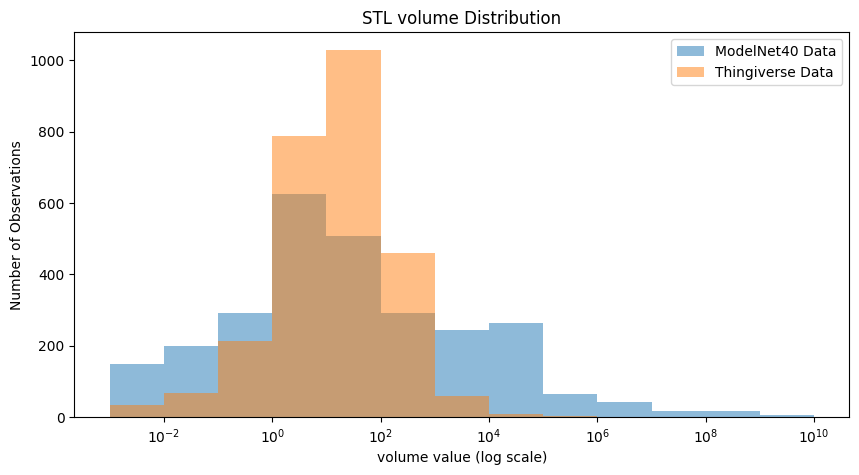

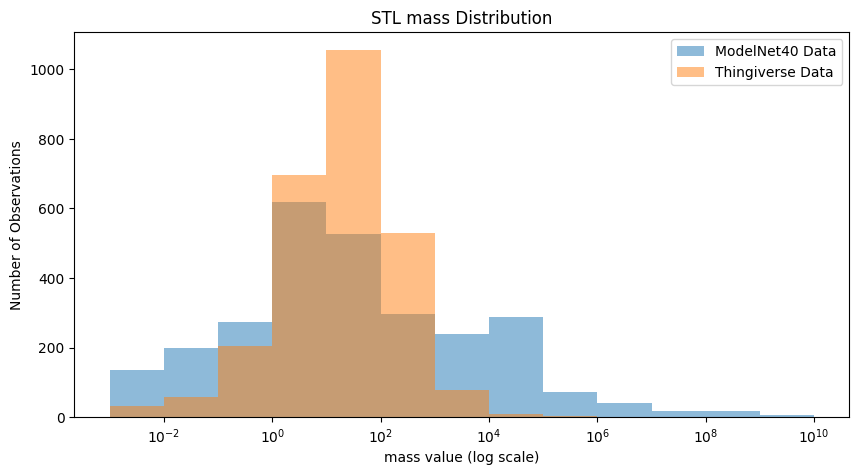

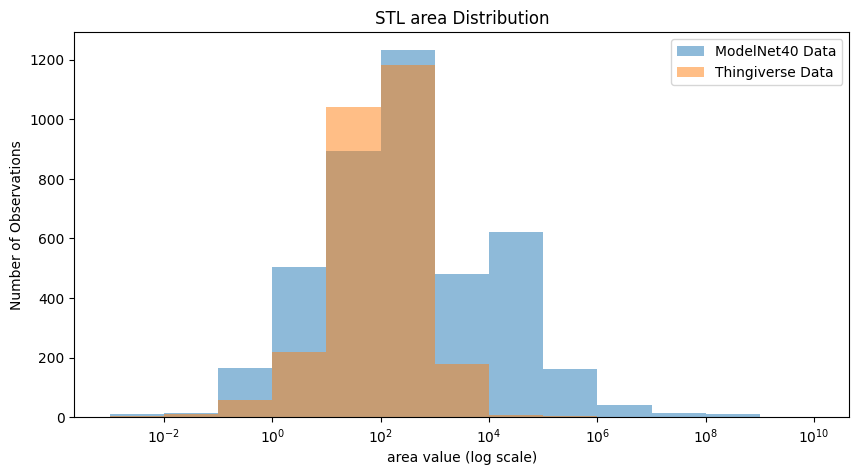

In [13]:
for col in mn_df.columns[1:]:
    logbins = 10.0**(np.arange(-3,11))
    plt.figure(figsize=(10,5))
    plt.hist(mn_df[col], bins=logbins, label="ModelNet40 Data", alpha = 0.5)
    plt.hist(tv_df[col], bins=logbins, label="Thingiverse Data", alpha = 0.5)
    plt.title("STL " + col + " Distribution")
    plt.ylabel("Number of Observations")
    plt.xlabel(col + " value (log scale)")
    plt.xscale('log')
    plt.legend()
    plt.show()

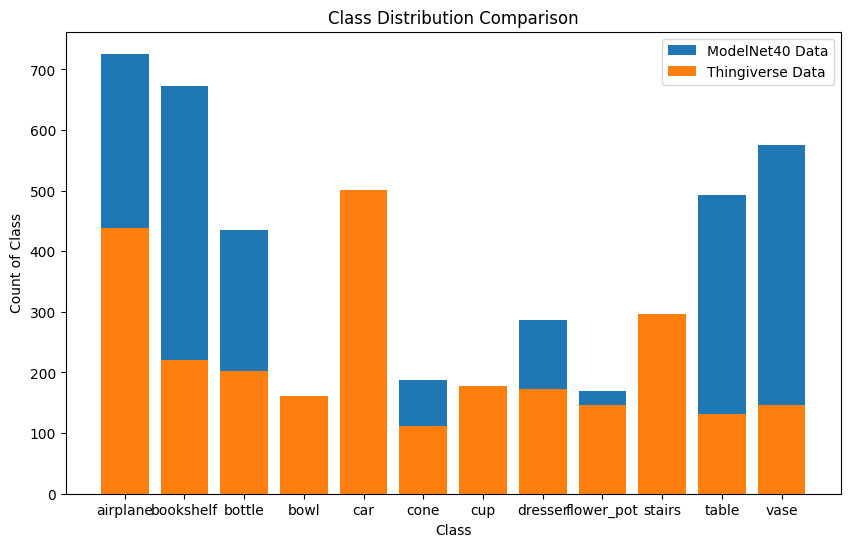

In [14]:
class_counts_df1 = mn_df['class'].value_counts().sort_index()
class_counts_df2 = tv_df['class'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(class_counts_df1.index, class_counts_df1.values, label='ModelNet40 Data')
plt.bar(class_counts_df2.index, class_counts_df2.values, label='Thingiverse Data')
plt.xlabel('Class')
plt.ylabel('Count of Class')
plt.title('Class Distribution Comparison')
plt.legend()
plt.show()

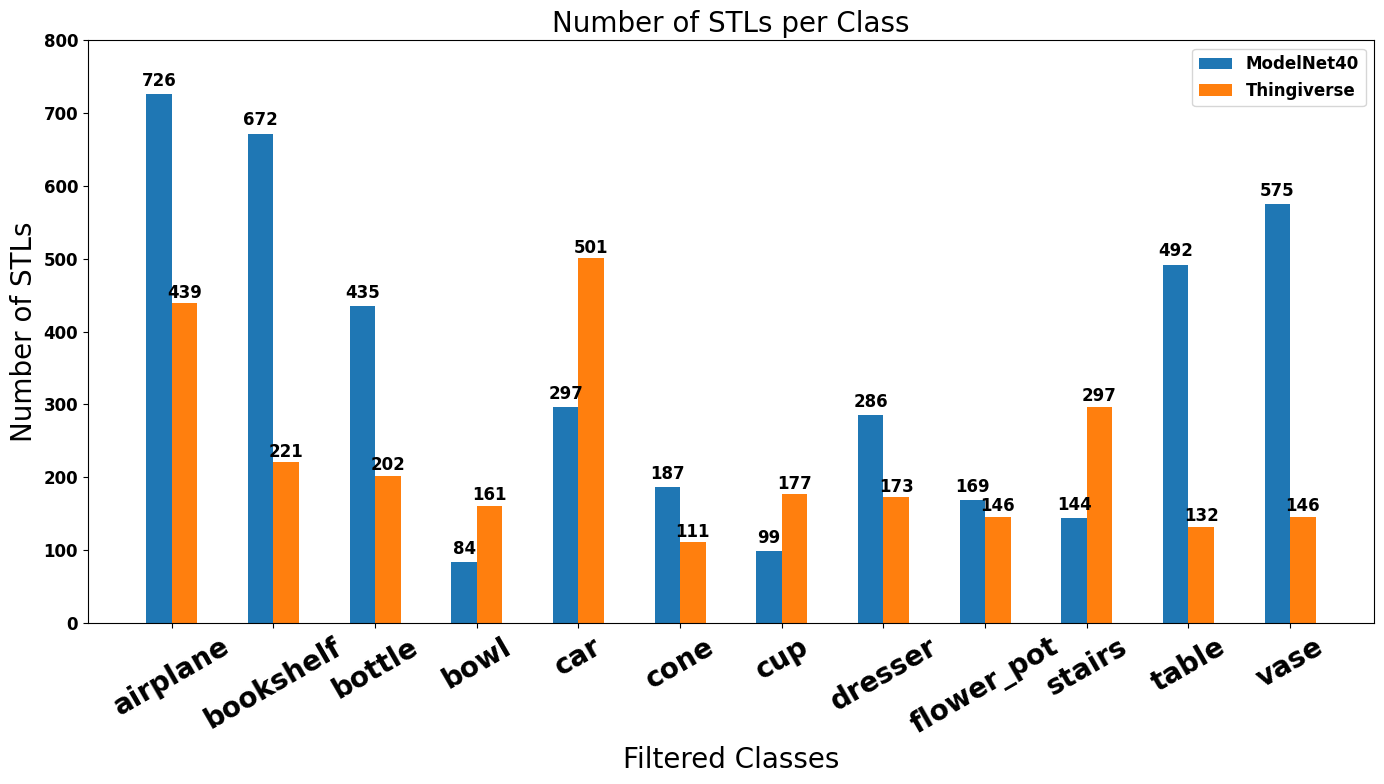

In [60]:
# plt.rcParams.update({'font.size': 20})
# plt.rcParams.update({'font.family': 'Sans'})
# matplotlib.rc('xtick', labelsize=20) 

SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

width = 0.25  # the width of the bars
x = np.arange(len(class_counts_df1))

fig, ax = plt.subplots(layout='tight', figsize=(14,8))

rects = ax.bar(x, class_counts_df1.values, width, label="ModelNet40")
ax.bar_label(rects, padding=3)
rects = ax.bar(x+width, class_counts_df2.values, width, label="Thingiverse")
ax.bar_label(rects, padding=1)

ax.set_ylabel('Number of STLs')
ax.set_xlabel('Filtered Classes')
ax.set_title('Number of STLs per Class')
ax.set_xticks(x+width/2, class_counts_df1.index)
ax.legend()
ax.set_ylim([0, 800])
plt.xticks(rotation=30)
plt.show()

<Figure size 640x480 with 0 Axes>

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

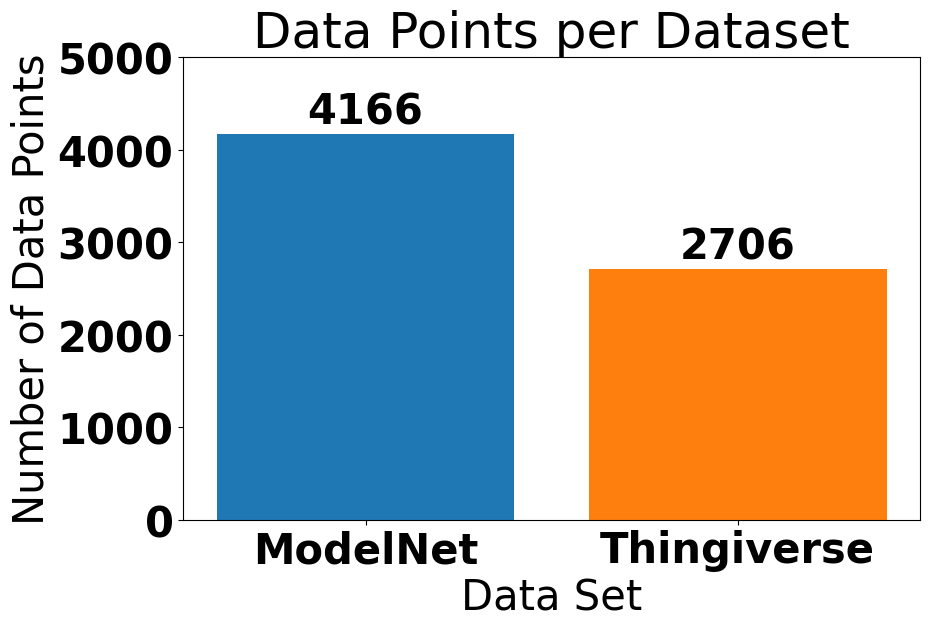

In [18]:
plt.figure()
fig, ax = plt.subplots(layout='tight', figsize=(10,7))

# rects = ax.bar(x, class_counts_df1.values, width, label="ModelNet40")
# ax.bar_label(rects, padding=3)
# rects = ax.bar(x+width, class_counts_df2.values, width, label="Thingiverse")
# ax.bar_label(rects, padding=1)

rects = ax.bar([0],mn_df.shape[0])
ax.bar_label(rects, padding=1)
rects = ax.bar([1],tv_df.shape[0])
ax.bar_label(rects, padding=1)

ax.set_ylabel('Number of Data Points')
ax.set_xlabel('Data Set')
ax.set_title('Data Points per Dataset')
ax.set_xticks([0,1],["ModelNet","Thingiverse"])
ax.set_ylim([0, 5000])
plt.show()